In [1]:
%load_ext watermark
%watermark

Last updated: 2022-01-19T14:45:30.185348-03:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 11, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [3]:
datos_cancer = datasets.load_breast_cancer()
datos_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(datos_cancer['DESCR'])

In [6]:
datos_cancer["target"][:30] # 0 => maligno 1=> benigno

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
datos_cancer.feature_names # X

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
datos_cancer.target_names # y

array(['malignant', 'benign'], dtype='<U9')

In [11]:
cancer_df = pd.DataFrame(datos_cancer["data"], columns = datos_cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
cancer_df['objetivo']=datos_cancer.target

In [13]:
cancer_df.shape

(569, 31)

In [14]:
cancer_df.objetivo.value_counts(True)

1    0.627417
0    0.372583
Name: objetivo, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
train_df, test_df = train_test_split(cancer_df, test_size = 0.3)
variables_independientes= datos_cancer.feature_names
variable_objetivo = "objetivo"

In [20]:
train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
447,14.80,17.66,95.88,674.8,0.09179,0.08890,0.040690,0.022600,0.1893,0.05886,...,22.74,105.90,829.5,0.12260,0.18810,0.206000,0.08308,0.3600,0.07285,1
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.60760,0.647600,0.28670,0.2355,0.10510,0
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.18120,0.190100,0.08296,0.1988,0.07053,1
462,14.40,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.017370,0.1707,0.05433,...,31.98,100.40,734.6,0.10170,0.14600,0.147200,0.05563,0.2345,0.06464,1
479,16.25,19.51,109.80,815.8,0.10260,0.18930,0.223600,0.091940,0.2151,0.06578,...,23.05,122.10,939.7,0.13770,0.44620,0.589700,0.17750,0.3318,0.09136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,13.65,13.16,87.88,568.9,0.09646,0.08711,0.038880,0.025630,0.1360,0.06344,...,16.35,99.71,706.2,0.13110,0.24740,0.175900,0.08056,0.2380,0.08718,1
388,11.27,15.50,73.38,392.0,0.08365,0.11140,0.100700,0.027570,0.1810,0.07252,...,18.93,79.73,450.0,0.11020,0.28090,0.302100,0.08272,0.2157,0.10430,1
327,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037,1
270,14.29,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.038660,0.03333,0.2458,0.06120,1


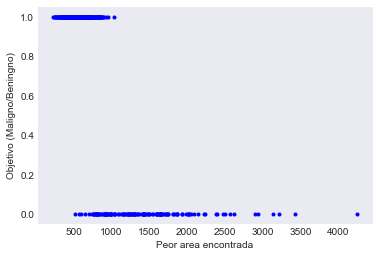

In [24]:
# ver un modelo de regresión lineal con una variable independiente
columna_independiente = "worst area"

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.plot(train_df[columna_independiente], train_df.objetivo,'.b')
plt.xlabel("Peor area encontrada")
plt.ylabel("Objetivo (Maligno/Beningno)")
plt.show()

In [33]:
modelo_ols = LinearRegression()
modelo_ols.fit(train_df[[columna_independiente]],train_df[variable_objetivo])
predicciones = modelo_ols.predict(test_df[[columna_independiente]])

In [34]:
predicciones[:20]

array([ 0.81561162,  0.03423637,  0.00281775,  0.6645651 ,  0.87068313,
        0.56645601,  0.86345092,  0.07217585,  0.14390516,  0.72295632,
        0.7260389 ,  0.76889865,  0.83879027,  0.73605729,  0.69165626,
        0.16287489, -0.05705548,  0.98450154,  0.41363108,  0.78282955])

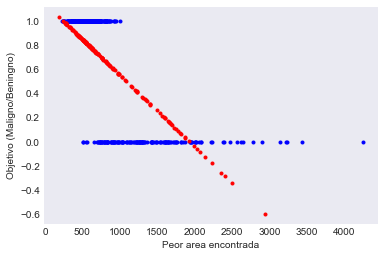

In [36]:
plt.plot(train_df[columna_independiente], train_df.objetivo,'.b')
plt.plot(test_df[columna_independiente], predicciones, '.r')
plt.xlabel("Peor area encontrada")
plt.ylabel("Objetivo (Maligno/Beningno)")
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
X = cancer_df[variables_independientes]
y = cancer_df[variable_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
regre_logistica = LogisticRegression()
regre_logistica.fit(X_train, y_train)
predicciones = regre_logistica.predict(X_test)

predicciones[:10]

C:\Users\Gamer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [41]:
predicciones_probabilidades = regre_logistica.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[9.99779581e-01, 2.20418622e-04],
       [2.35395204e-03, 9.97646048e-01],
       [6.80977689e-02, 9.31902231e-01],
       [9.99990609e-01, 9.39119540e-06],
       [9.99976110e-01, 2.38898884e-05],
       [1.00378807e-02, 9.89962119e-01],
       [7.39110768e-03, 9.92608892e-01],
       [2.31702061e-02, 9.76829794e-01],
       [4.13894863e-03, 9.95861051e-01],
       [9.95058791e-01, 4.94120937e-03]])

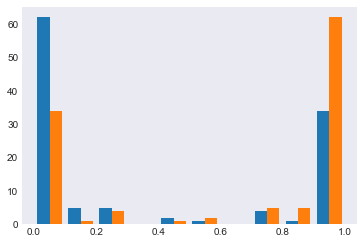

In [43]:
plt.hist(predicciones_probabilidades)
plt.show()

In [44]:
probs_df = pd.DataFrame(predicciones_probabilidades)
probs_df[:10]

,0,1
0,0.999780,0.000220
1,0.002354,0.997646
2,0.068098,0.931902
3,0.999991,0.000009
4,0.999976,0.000024
5,0.010038,0.989962
6,0.007391,0.992609
7,0.023170,0.976830
8,0.004139,0.995861
9,0.995059,0.004941


In [49]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.to_list()
X["prediccion"] = predicciones
X = pd.concat([X,probs_df], axis = 1)
X[['objetivo','prediccion',0,1]].head(30)

,objetivo,prediccion,0,1
0,0,0,0.999780,2.204186e-04
1,1,1,0.002354,9.976460e-01
2,1,1,0.068098,9.319022e-01
3,0,0,0.999991,9.391195e-06
4,0,0,0.999976,2.388989e-05
5,1,1,0.010038,9.899621e-01
6,1,1,0.007391,9.926089e-01
7,1,1,0.023170,9.768298e-01
8,1,1,0.004139,9.958611e-01
9,0,0,0.995059,4.941209e-03
